In [2]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

In [3]:
shots = pd.read_csv('.data/shots.csv')

In [6]:
shots.loc[:, 'freeze_frame'] = shots.loc[:, 'freeze_frame'].apply(ast.literal_eval)

In [8]:
shots.loc[:, 'freeze_frame'][134]

[{'freeze_frame': [{'location': [113.6, 35.5],
    'player': {'id': 15618, 'name': 'Jasmine Matthews'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'teammate': False},
   {'location': [113.8, 36.6],
    'player': {'id': 16381, 'name': 'Gemma Evans'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'teammate': False},
   {'location': [95.6, 18.1],
    'player': {'id': 4660, 'name': 'Erin Cuthbert'},
    'position': {'id': 15, 'name': 'Left Center Midfield'},
    'teammate': True},
   {'location': [110.4, 23.1],
    'player': {'id': 24922, 'name': 'Florence Allen'},
    'position': {'id': 2, 'name': 'Right Back'},
    'teammate': False},
   {'location': [107.3, 23.9],
    'player': {'id': 16384, 'name': 'Carla Humphrey'},
    'position': {'id': 12, 'name': 'Right Midfield'},
    'teammate': False},
   {'location': [113.2, 39.3],
    'player': {'id': 24239, 'name': 'Jemma Elizabeth Purfield'},
    'position': {'id': 6, 'name': 'Left Back'},
    'teammate': False

In [13]:
def ff_unpacking(players):
    players = players[0]['freeze_frame']
    for i in players:
        if i['position']['name'] == 'Goalkeeper' and i['teammate'] == False:
            gk_loc = i['location']
            return gk_loc
        
sample = shots.loc[:, 'freeze_frame'][444]
        
        
ff_locs = pd.DataFrame()
for i in sample[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,16384,Carla Humphrey,15,Left Center Midfield,110.6,42.9
1,True,31527,Ebony Salmon,23,Center Forward,99.6,27.5
2,False,18158,Rebecca Leigh Spencer,1,Goalkeeper,119.3,36.1
3,False,53440,Esther Morgan,2,Right Back,116.5,25.8
4,False,4648,Abbie McManus,3,Right Center Back,113.3,31.8
5,False,5074,Shelina Laura Zadorsky,5,Left Center Back,113.1,38.7
6,False,18145,Ria Percival,13,Right Center Midfield,103.4,30.2
7,False,15572,Siri Worm,6,Left Back,113.4,46.4
8,False,5078,Alanna Stephanie Kennedy,15,Left Center Midfield,112.8,41.6


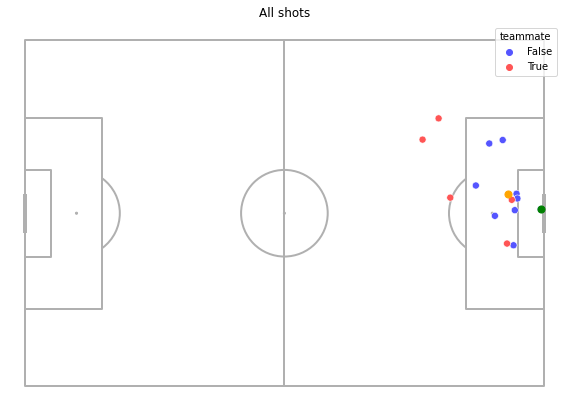

In [10]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

ax.scatter(ff_locs.loc[13, 'x'], ff_locs.loc[13, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[134, 'x_start'], shots.loc[134, 'y_start'], c = 'orange', s = 50)


#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [14]:
def ff_unpacking(players):
    players = players[0]['freeze_frame']
    for i in players:
        pl_loc = i['location']
        return pl_loc
        
sample = shots.loc[:, 'freeze_frame'][444]
        
        
ff_locs = pd.DataFrame()
for i in sample[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,16384,Carla Humphrey,15,Left Center Midfield,110.6,42.9
1,True,31527,Ebony Salmon,23,Center Forward,99.6,27.5
2,False,18158,Rebecca Leigh Spencer,1,Goalkeeper,119.3,36.1
3,False,53440,Esther Morgan,2,Right Back,116.5,25.8
4,False,4648,Abbie McManus,3,Right Center Back,113.3,31.8
5,False,5074,Shelina Laura Zadorsky,5,Left Center Back,113.1,38.7
6,False,18145,Ria Percival,13,Right Center Midfield,103.4,30.2
7,False,15572,Siri Worm,6,Left Back,113.4,46.4
8,False,5078,Alanna Stephanie Kennedy,15,Left Center Midfield,112.8,41.6
